In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

from prml.utils.plot import plot_regression1D,plot_regression1D_with_std,plot_classifier 
from prml.utils.datasets import RegressionDataGenerator,ClassificationDataGenerator2
from prml.kernel_method import (
    DualRegression,
    NadarayaWatson, 
    GaussianProcessRegression, 
    GaussianProcessClassifier
)

In [2]:
def f(x):
    return np.sin(x)

def f2(x):
    return -0.7*(x - 5/2)**2 + 3

# Dual Representation

## Linear Kernel

RMSE : 0.6494071200218063


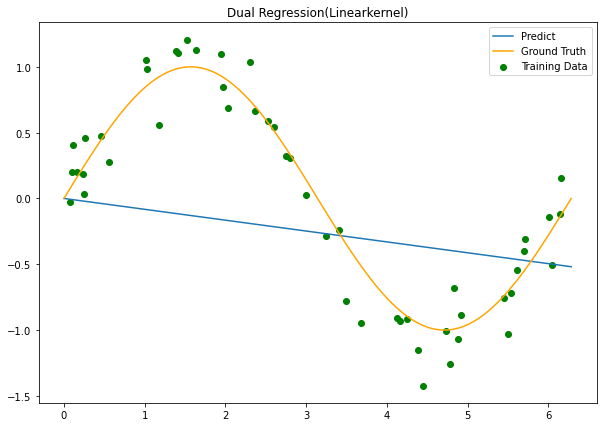

In [3]:
dual_regressor = DualRegression(lamda=1e-6,kernel="Linear") 
generator = RegressionDataGenerator(f)

X,y = generator(lower=0,upper=2*np.pi,std=0.2) 
dual_regressor.fit(X,y) 
plot_regression1D(X,y,dual_regressor,"Dual Regression(Linearkernel)",f)

## Gaussian Kernel

RMSE : 0.13953747757611196


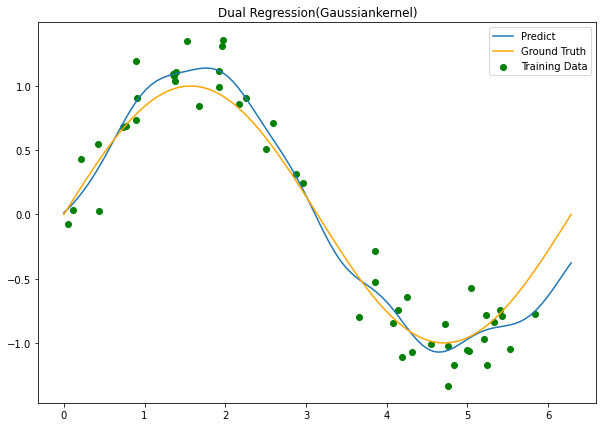

In [4]:
dual_regressor = DualRegression(lamda=1e-1,kernel="Gaussian",sigma=0.5) 
generator = RegressionDataGenerator(f)

X,y = generator(lower=0,upper=2*np.pi,std=0.2) 
dual_regressor.fit(X,y) 
plot_regression1D(X,y,dual_regressor,"Dual Regression(Gaussiankernel)",f)

## Sigmoid Kernel

RMSE : 0.22792700395664936


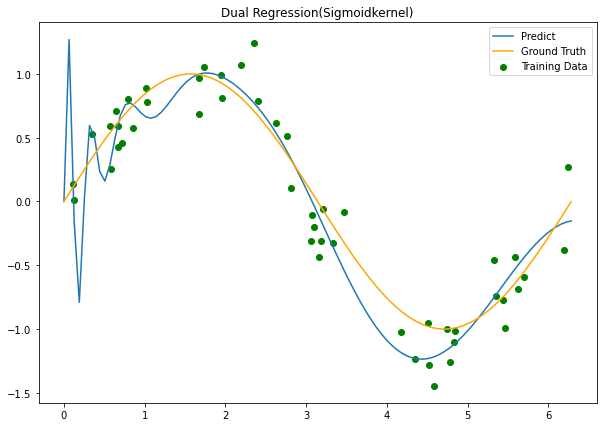

In [5]:
dual_regressor = DualRegression(lamda=1e-4,kernel="Sigmoid",a=1.0,b=0.0) 
generator = RegressionDataGenerator(f)

X,y = generator(lower=0,upper=2*np.pi,std=0.2) 
dual_regressor.fit(X,y) 
plot_regression1D(X,y,dual_regressor,"Dual Regression(Sigmoidkernel)",f)

## Exponential Kernel

RMSE : 0.06091146120996741


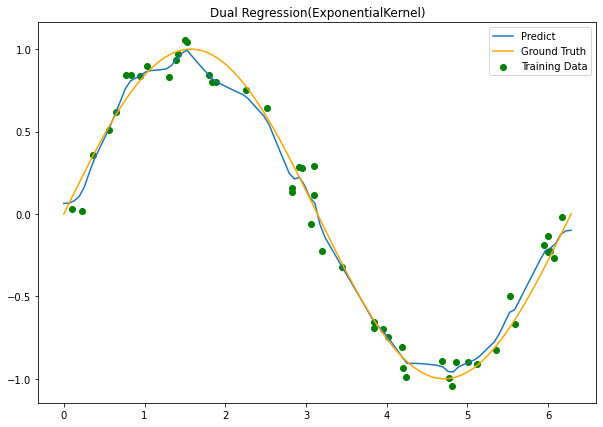

In [6]:
dual_regressor = DualRegression(lamda=1e-1,kernel="Exponential",theta=0.5) 

generator = RegressionDataGenerator(f)

X,y = generator(lower=0,upper=2*np.pi,std=0.1) 
dual_regressor.fit(X,y) 
plot_regression1D(X,y,dual_regressor,"Dual Regression(ExponentialKernel)",f)

# Nadaraya Watson 

RMSE : 0.28845552409886227


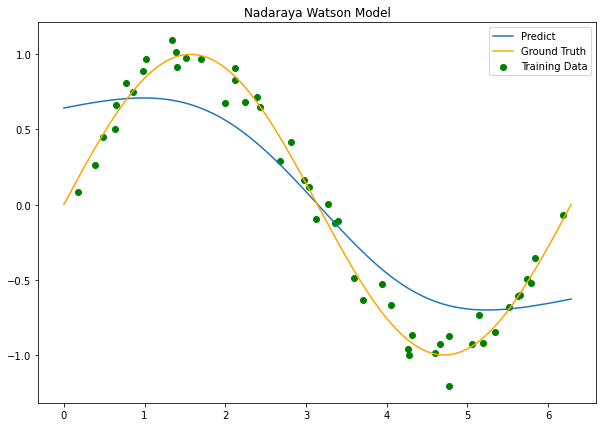

In [7]:
def g(x):
    return np.exp(-0.5*x**2)

watson = NadarayaWatson(g=g)
generator = RegressionDataGenerator(f)

X,y = generator(lower=0,upper=2*np.pi,std=0.1) 
watson.fit(X,y) 
plot_regression1D(X,y,watson,"Nadaraya Watson Model",f)

# Gaussian Process for Regression

RMSE : 0.11882005583752453


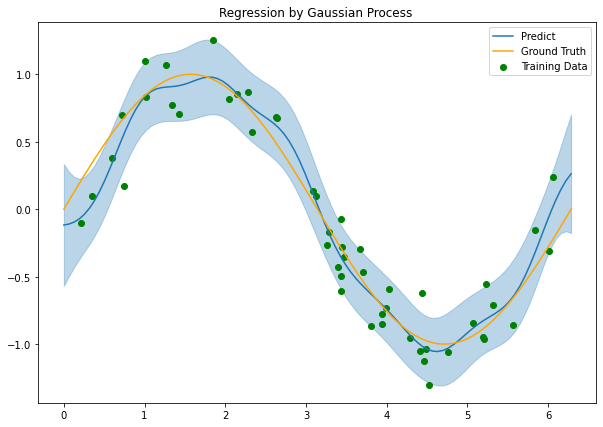

In [8]:
gp = GaussianProcessRegression(beta=20.0,kernel="Gaussian",sigma=0.5)

generator = RegressionDataGenerator(f)

X,y = generator(lower=0,upper=2*np.pi,std=0.2) 
gp.fit(X,y) 
plot_regression1D_with_std(X,y,gp,"Regression by Gaussian Process ",f)

# Gaussian Process for Classification

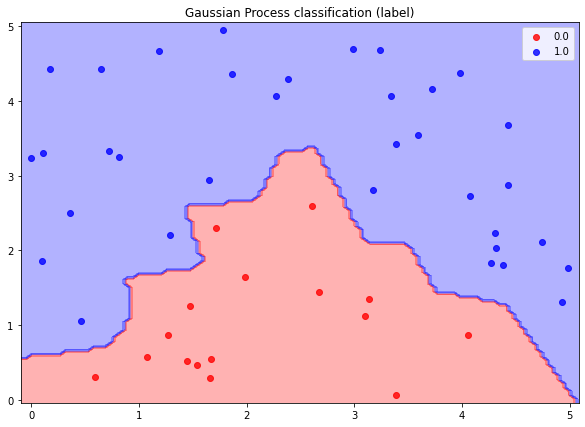

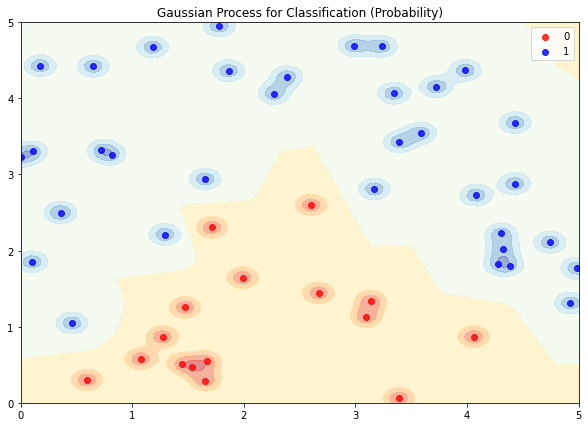

In [9]:
gen = ClassificationDataGenerator2(f2) 
X_tr,y_tr = gen(encoding="label")  

gpc = GaussianProcessClassifier(kernel="Gaussian",max_iter=10,alpha=1e-3,gamma=1e-4)
gpc.fit(X_tr,y_tr)
plot_classifier(X_tr,y_tr,gpc,title="Gaussian Process classification (label)")

x = np.linspace(0,5,100)
y = np.linspace(0,5,100)
xs,ys = np.meshgrid(x,y)
probs = gpc.predict(np.array([xs.ravel(),ys.ravel()]).T,return_prob=True).ravel() 
probs = probs.reshape(xs.shape)

cmap = plt.get_cmap("RdYlBu")
figure,axes = plt.subplots(1,1,figsize=(10,7))
axes.contourf(xs,ys,probs,alpha=0.5,cmap = cmap)
axes.set_xlim(0,5)
axes.set_ylim(0,5)

axes.scatter(x = X_tr[y_tr == 0,0],
            y = X_tr[y_tr == 0,1],
            alpha = 0.8,
            c = "red",
            label = "0")
axes.scatter(x = X_tr[y_tr == 1,0],
            y = X_tr[y_tr == 1,1],
            alpha = 0.8,
            c = "blue",
            label = "1")

axes.set_title("Gaussian Process for Classification (Probability)")
plt.legend()
plt.show()